In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import datetime as dt

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [46]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [47]:
# View all of the classes that automap found
# inspector = inspect(engine)
# inspector.get_table_names()
    class_names = list(Base.classes.keys())
print(class_names)

['measurement', 'station']


In [62]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [17]:
# Find one year ago from the most recent date in the data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


Text(0, 0.5, 'Inches')

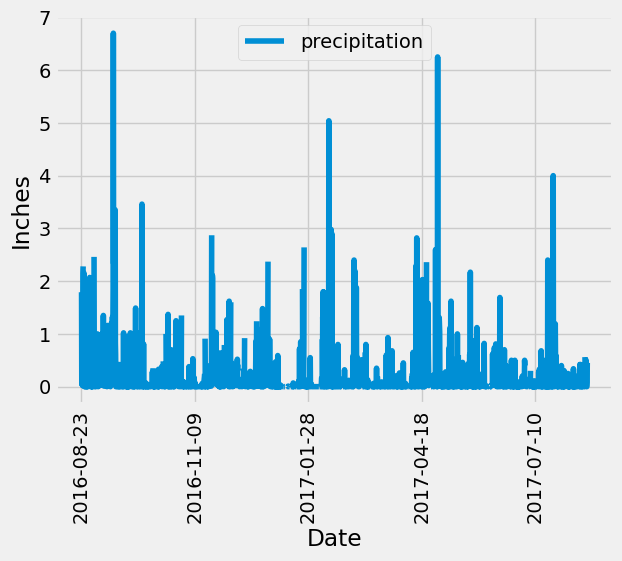

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = (
    session
    .query(
        Measurement.date, Measurement.prcp
    )
    .filter(
        Measurement.date >= one_year_ago
    ).all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
pd.DataFrame(df['precipitation'].describe())

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(func.distinct(Measurement.station))).all()

[(9,)]

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations =(
    session
    .query(
        Measurement.station, 
        func.count(
            Measurement.station
        ))
    .group_by(
        Measurement.station
    )
    .order_by(
        func.count(Measurement.station).desc()
    ).all()
)

result = [(station, count) for station, count in active_stations]
print(result)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [57]:
#Get the most recent date for the slected sation
latest_date_station = (
    session
    .query(
        Measurement.date
    )
    .order_by(
        Measurement.date.desc()
    )
    .filter(
        Measurement.station == 'USC00519281'
    )
    .first()
)
latest_date_station

('2017-08-18',)

Text(0, 0.5, 'Frequency')

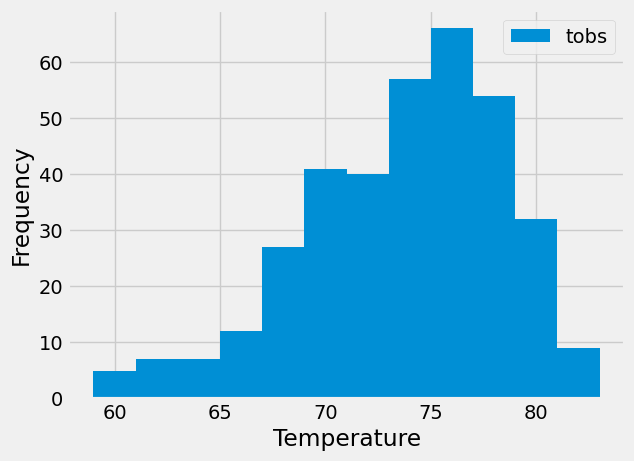

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago_station = dt.date(2017, 8, 18) - dt.timedelta(days=365)

results = (
    session
    .query(Measurement.tobs)
    .filter(
        Measurement.station == 'USC00519281',
        Measurement.date >= one_year_ago_station,
        Measurement.date <= '2017-08-18'
    )
    .all()
)

temperatures = [result[0] for result in results]

plt.hist(temperatures, bins=12)
plt.legend({'tobs'})
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [63]:
# Close Session
session.close()